In [54]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as smapi
import statsmodels.graphics as smgraphics

In [38]:
# Load Linear Train Data
linear_data = []
linear_labels = []
with open('linear/train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # To avoid bad data
        if row['x'] and row['y']:
            linear_data.append(float(row['x']))
            linear_labels.append(float(row['y']))

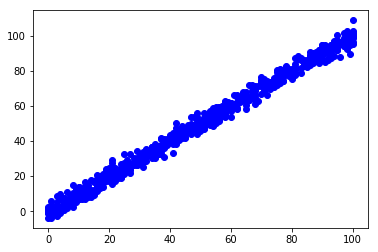

In [67]:
#Plot original data
def plot_data(data, labels):
    plt.plot(data, labels, 'bo')
    
#Plot anomalies
def plot_anomalies_data(data, labels, anomalies_data, anomalies_labels):
    plt.plot(anomalies_data, anomalies_labels, 'ro')
    plt.plot(data, labels, 'bo')
    plt.show()

plot_data(linear_data, linear_labels)

In [40]:
#Generate random point
def generate_random_point(min_val, max_val):
    return random.uniform(min_val, max_val)

#Add random points to the data
def add_random_points(number, data, labels):
    res_data = list(data)
    res_labels = list(labels)
    maxX = max(data)
    minX = min(data)
    maxY = max(labels)
    minY = min(labels)
    for i in range(number):
        rx = generate_random_point(minX, maxX)
        ry = generate_random_point(minY, maxY)
        res_data.append(rx)
        res_labels.append(ry)
    return (res_data, res_labels)

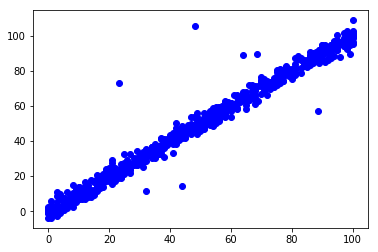

In [69]:
#Add random point to data
(data2, labels2) = add_random_points(10, linear_data, linear_labels)
plot_data(data2, labels2)

In [56]:
# Make regression #
regression = smapi.OLS(data2, labels2).fit()
# Find anomalies #
test = regression.outlier_test()
anomalies = list(((data2[i],labels2[i]) for i,t in enumerate(test) if t[2] < 0.5))

In [60]:
# Get Anomalies data and labels
anomalies_data = []
anomalies_labels = []
for anomaly in anomalies:
    anomalies_data.append(anomaly[0])
    anomalies_labels.append(anomaly[1])


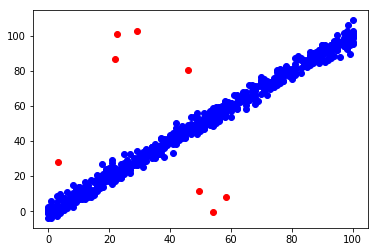

In [68]:
# Remove Anomalies from the dataset that has random points
data3 = []
labels3 = []
for index in range(len(data2)):
    d = data2[index]
    l = labels2[index]
    if d in anomalies_data:
        anomaly_index = anomalies_data.index(d)
        if anomalies_labels[anomaly_index] == l:
            continue
    data3.append(d)
    labels3.append(l)
    
plot_anomalies_data(data3, labels3, anomalies_data, anomalies_labels)